# Analiza sportowa
# Projekt realizowany w ramach przedmiotu _Metody przetwarzania dużych ilości danych_

## Źródła danych
+ Dane pobrane ze strony https://www.flashscore.pl
+ Dane pobrane ze strony https://www.transfermarkt.pl
+ __Football API__ SportMonks https://www.sportmonks.com/football-api

## Grupa projektowa
+ Maciej Grzela
+ Paweł Owczarek
+ Filip Kozak
+ Szymon Tusznio

# Zaimportowanie wszystkich bibliotek używanych w czasie realizacji projektu

In [5]:
import pip

if int(pip.__version__.split('.')[0])>9:
    from pip._internal import main
else:
    from pip import main
def install(package):
    main(['install', package])

install('BeautifulSoup4')

import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


# Zwycięzcy rozgrywek ligowych w polsce w latach 1998/1999 - 2020/2021

In [6]:
try:
    file = open("flashscore-ekstraklasa-archive.html", "r")
    html_data = file.read()
    file.close()
except IOError:
    webpage = requests.get("https://www.flashscore.pl/pilka-nozna/polska/pko-bp-ekstraklasa/archiwum/")
    file = open("flashscore-ekstraklasa-archive.html", "w+")
    file.write(webpage.text)
    html_data = webpage.text
    file.close()

soup = BeautifulSoup(html_data, 'html.parser')
seasons_table = soup.select('#tournament-page-archiv > .profileTable__row--background')

season_names = list()
season_winners = list()

for line in seasons_table[1:]:
    season_name = line.select('.leagueTable__seasonName > a')
    season_names.append(season_name[0].text)
    season_winner = line.select('.leagueTable__winnerBlock > .leagueTable__seasonName > a')
    season_winners.append(season_winner[0].text)


seasons_df = pd.DataFrame({
    'Season': pd.Series(season_names),
    'Winner': pd.Series(season_winners),
}, columns=['Season', 'Winner'])

seasons_df = seasons_df.set_index('Season')
seasons_df

,Winner
Season,
PKO BP Ekstraklasa 2020/2021,Legia Warszawa
PKO BP Ekstraklasa 2019/2020,Legia Warszawa
LOTTO Ekstraklasa 2018/2019,Piast Gliwice
LOTTO Ekstraklasa 2017/2018,Legia Warszawa
LOTTO Ekstraklasa 2016/2017,Legia Warszawa
Ekstraklasa 2015/2016,Legia Warszawa
Ekstraklasa 2014/2015,Lech Poznań
Ekstraklasa 2013/2014,Legia Warszawa
Ekstraklasa 2012/2013,Legia Warszawa


# Liczba zwycięstw w lidze dla każdego z zespołów, który wygrał ligę co najmniej raz

<AxesSubplot:xlabel='Winner'>

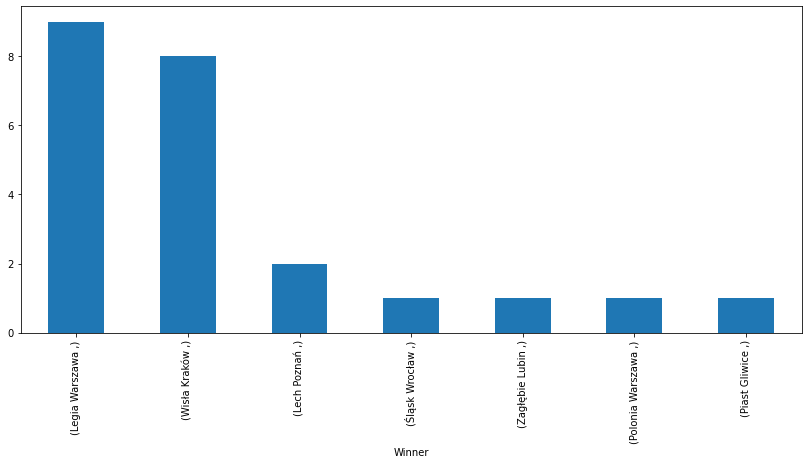

In [7]:
seasons_df.value_counts().plot(kind='bar', figsize=(14,6))